In [ ]:
# Rugosidad del terreno 

**Prueba inicial**



In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import iris
import iris.quickplot as qplt
import cartopy
from cartopy import config
import cartopy.crs as ccrs


from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap

In [2]:
PATH = '/Users/tmorales/tmp/RNN-windPower/database/surface_roughness'
filename = 'sfcr.sfc.mon.mean.nc'

In [3]:
dataset = Dataset(os.path.join(PATH, filename))
dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: COARDS
    description: Data is from NCEP initialized reanalysis
(4x/day).  It consists of T42  variables interpolated to
pressure surfaces from model (sigma) surfaces.
    platform: Model
    NCO: 20121013
    history: Created 2011/06/28 by ESRL/PSD Web & Data Team
Converted to chunked, deflated non-packed NetCDF4 2014/09
    title: monthly mean sfcr.sfc from the NCEP Reanalysis
    References: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.derived.html
    dataset_title: NCEP-NCAR Reanalysis 1
    dimensions(sizes): lat(94), lon(192), time(840)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), float32 sfcr(time,lat,lon)
    groups: 

In [7]:
lats = dataset.variables['lat'][:] ; print(lats.shape) 
lons = dataset.variables['lon'][:] ; print(lons.shape)
time = dataset.variables['time'][:]; print(time.shape)
sfcr = dataset.variables['sfcr'][:]; print(sfcr.shape)

(94,)
(192,)
(840,)
(840, 94, 192)


In [8]:
sfcr_0 = sfcr[0,:,:]; print(sfcr_0.shape)

(94, 192)


### cartopy

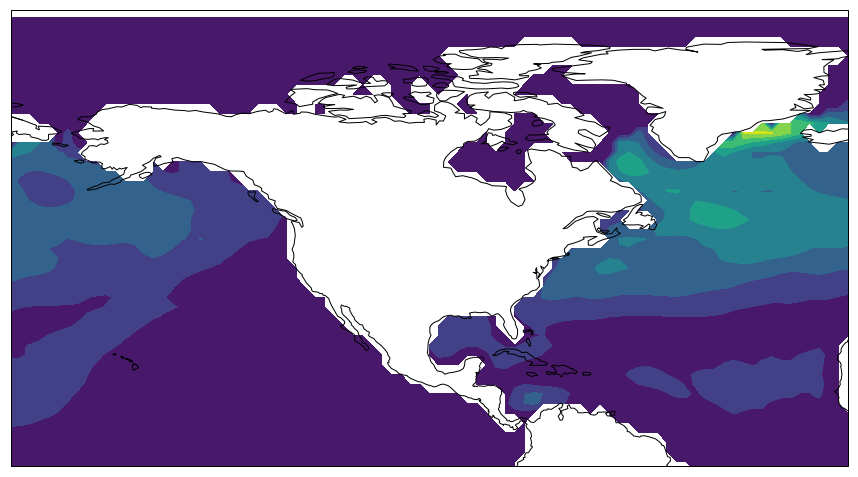

In [24]:
plt.figure(figsize=(15, 15))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.set_extent([-15, -180, 90, 0])
#ax.add_feature(cartopy.feature.LAND)
#ax.add_feature(cartopy.feature.OCEAN)
#ax.add_feature(cartopy.feature.COASTLINE)
#ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
#ax.add_feature(cartopy.feature.RIVERS)
plt.contourf(lons, lats, sfcr_0,
             #transform=cartopy.crs.PlateCarree()
            )
ax.coastlines()


In [18]:
sfcr_0

masked_array(data =
 [[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]],
             mask =
 [[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]],
       fill_value = -9.96921e+36)